In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
queryname = "compare1000"
querypath = "data/user_data/output"

In [ ]:
all_files = os.listdir(querypath)
matched_files = [f for f in all_files if f.startswith(queryname)]

In [ ]:
merged_df = None


for i, file in enumerate(matched_files):
    file_path = os.path.join(querypath, file)

    df = pd.read_csv(file_path)
    df.columns = [
        f"{col}_{i}"
        if col not in ["inputseq", "inputCAI", "inputGC", "inputMFE", "inputTAI", "id"]
        else col
        for col in df.columns
    ]

    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(
            merged_df,
            df,
            on=["inputseq", "inputCAI", "inputGC", "inputMFE", "inputTAI", "id"],
            how="inner",
        )

In [ ]:
output_cai_columns = [col for col in merged_df.columns if col.startswith("outputCAI")]
output_tai_columns = [col for col in merged_df.columns if col.startswith("outputTAI")]


cai_rank = merged_df[output_cai_columns].rank(axis=1, method="min", ascending=False)
tai_rank = merged_df[output_tai_columns].rank(axis=1, method="min", ascending=False)


common_suffixes = [col.replace("outputCAI", "") for col in output_cai_columns]


MaxOutputCAI = []
MaxOutputTAI = []
MAXSeq = []

for i in range(len(merged_df)):
    combined_rank = cai_rank.iloc[i].values + tai_rank.iloc[i].values

    best_col_index = combined_rank.argmin()

    best_suffix = common_suffixes[best_col_index]
    best_columncai = merged_df.iloc[i][f"outputCAI{best_suffix}"]
    best_columntai = merged_df.iloc[i][f"outputTAI{best_suffix}"]
    best_coluumnseq = merged_df.iloc[i][f"outputseq{best_suffix}"]
    MaxOutputCAI.append(best_columncai)
    MaxOutputTAI.append(best_columntai)
    MAXSeq.append(best_coluumnseq)
merged_df["MaxOutputCAI"] = MaxOutputCAI
merged_df["MaxOutputTAI"] = MaxOutputTAI
merged_df["outputseq"] = MAXSeq

# icor

In [7]:
df_icor = pd.read_csv(
    "data/test_data/cai/icor_val.csv",
    header=None,
    names=["inputseq", "outputseq", "inputCAI", "outputCAI"],
)

In [8]:
df_icor_tai = pd.read_csv("data/test_data/tai/icor_val.csv")
df_icor_tai = df_icor_tai.T
df_icor_tai.columns = ["inputTAI", "outputTAI"]
df_icor_tai.reset_index(inplace=True)

In [9]:
df_icor = pd.concat([df_icor, df_icor_tai], axis=1)

# codonopt

In [10]:
df_codonop = pd.read_csv(
    "data/test_data/cai/codonop_val.csv",
    header=None,
    names=["id", "inputseq", "outputseq", "inputCAI", "outputCAI"],
)

df_codonop_tai = pd.read_csv("data/test_data/tai/codonop_val.csv")
df_codonop_tai = df_codonop_tai.T
df_codonop_tai.columns = ["inputTAI", "outputTAI"]
df_codonop_tai.reset_index(inplace=True)

df_codonop = pd.concat([df_codonop, df_codonop_tai], axis=1)

# genescript

In [11]:
df_genescript = pd.read_csv(
    "data/test_data/cai/genescript1000_val.csv",
    header=None,
    names=["inputseq", "outputseq", "inputCAI", "outputCAI"],
)
df_genescript.reset_index(inplace=True)
df_genescript_tai = pd.read_csv("data/test_data/tai/genescript1000_val.csv")
df_genescript_tai = df_genescript_tai.T
df_genescript_tai.columns = ["inputTAI", "outputTAI"]
df_genescript_tai.reset_index(inplace=True)

df_genescript = pd.concat([df_genescript, df_genescript_tai], axis=1)

# IDT

In [12]:
df_idt = pd.read_csv(
    "data/test_data/cai/idt1000_val.csv",
    header=None,
    names=["inputseq", "outputseq", "inputCAI", "outputCAI"],
)
df_idt.reset_index(inplace=True)
df_idt_tai = pd.read_csv("data/test_data/tai/idt1000_val.csv")
df_idt_tai = df_idt_tai.T
df_idt_tai.columns = ["inputTAI", "outputTAI"]
df_idt_tai.reset_index(inplace=True)

df_idt = pd.concat([df_idt, df_idt_tai], axis=1)

## CAI

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_teachcai = pd.read_csv(
    "data/test_data/cai/mymodel_val.csv",
    header=None,
    names=["inputseq", "outputseq", "inputCAI", "outputCAI"],
)
df_teachtai = pd.read_csv("data/test_data/tai/mymodel_val.csv")
df_teachtai = df_teachtai.T
df_teachtai.columns = ["inputTAI", "outputTAI"]
df_teachtai.reset_index(inplace=True)
df_teach = pd.concat([df_teachcai, df_teachtai], axis=1)

In [15]:
plot_df = pd.DataFrame(
    {
        "CAI": pd.concat(
            [
                merged_df["inputCAI"],
                df_genescript["outputCAI"],
                df_idt["outputCAI"],
                merged_df["MaxOutputCAI"],
                df_icor["outputCAI"],
                df_codonop["outputCAI"],
            ],
            axis=0,
        ),
        "TAI": pd.concat(
            [
                merged_df["inputTAI"],
                df_genescript["outputTAI"],
                df_idt["outputTAI"],
                merged_df["MaxOutputTAI"],
                df_icor["outputTAI"],
                df_codonop["outputTAI"],
            ],
            axis=0,
        ),
        "source": ["input"] * len(merged_df)
        + ["GeneScript"] * len(df_genescript)
        + ["IDT"] * len(df_idt)
        + ["myModel"] * len(merged_df)
        + ["ICOR"] * len(df_icor)
        + ["CodonOP"] * len(df_codonop),
    }
)

In [16]:
plot_df

,CAI,TAI,source
0,0.638384,0.286187,input
1,0.581488,0.263550,input
2,0.586222,0.247515,input
3,0.545378,0.226907,input
4,0.598733,0.270498,input
...,...,...,...
868,0.975963,0.403406,CodonOP
869,0.965285,0.371122,CodonOP
870,0.957921,0.361785,CodonOP
871,0.952646,0.330799,CodonOP


/tmp/ipykernel_1038/3454136550.py:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


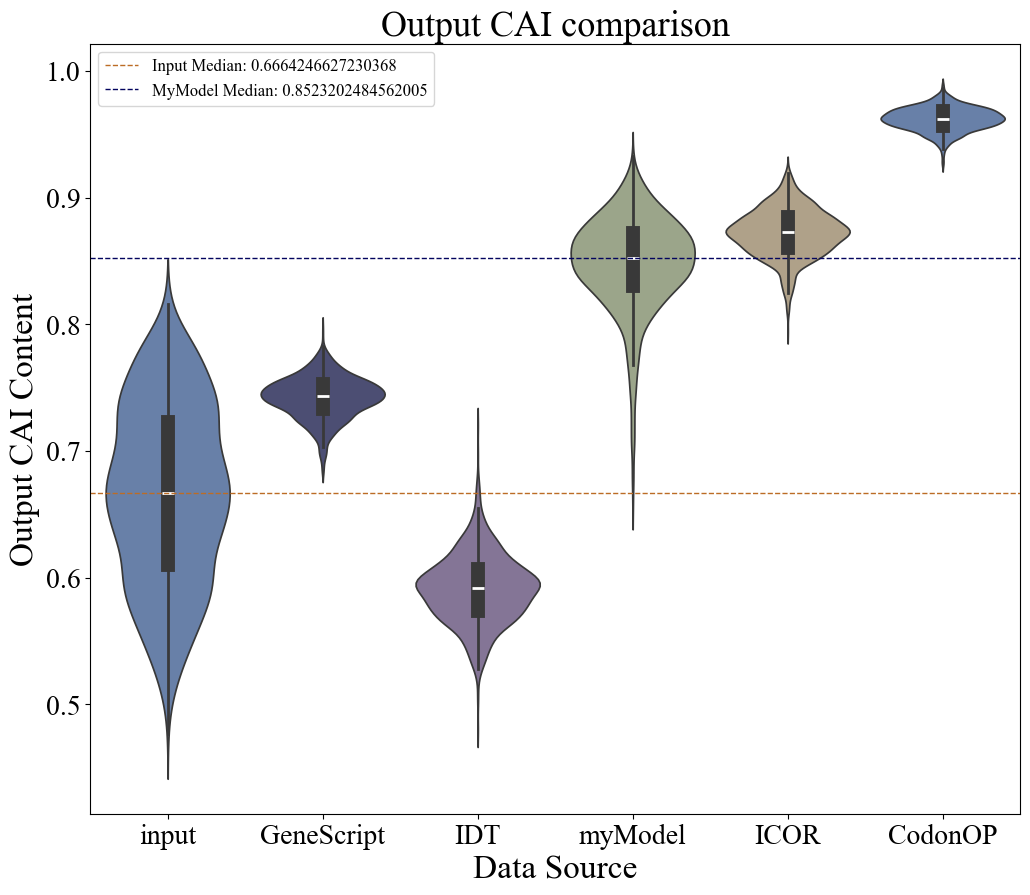

In [ ]:
plt.figure(figsize=(12, 10))
plt.rcParams["font.family"] = "Times New Roman"
custom_palette = ["#5d7db3", "#464879", "#84709b", "#9ca986", "#b5a283"]
sns.violinplot(
    x="source",
    y="CAI",
    data=plot_df,
    hue="source",
    palette=custom_palette,
    inner_kws=dict(
        box_width=10,
        whis_width=2,
    ),
)

input_median = np.median(merged_df["inputCAI"])
mymodel_median = np.median(merged_df["MaxOutputCAI"])
plt.axhline(
    input_median,
    color="#bc6c25",
    linestyle="--",
    linewidth=1,
    label=f"Input Median: {input_median}",
)
plt.axhline(
    mymodel_median,
    color="#03045e",
    linestyle="--",
    linewidth=1,
    label=f"MyModel Median: {mymodel_median}",
)


plt.title("Output CAI comparison", fontsize=26)
plt.xlabel("Data Source", fontsize=24)
plt.ylabel("Output CAI Content", fontsize=24)
plt.legend(loc="upper left", fontsize=12)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.savefig(f"tools/draw/outpic/CAI.png", dpi=300)
plt.savefig(f"tools/draw/outpic/CAI.svg")

plt.show()

/tmp/ipykernel_1038/1072579049.py:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


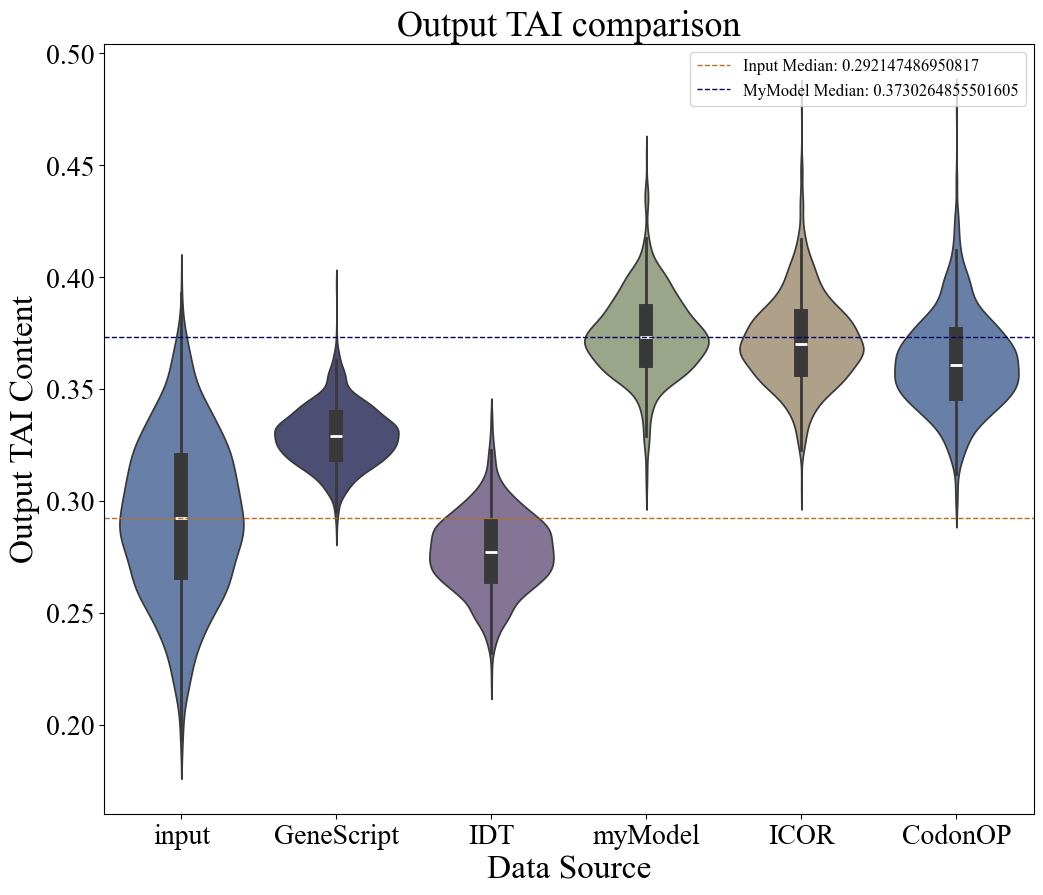

In [ ]:
plt.figure(figsize=(12, 10))
plt.rcParams["font.family"] = "Times New Roman"
custom_palette = ["#5d7db3", "#464879", "#84709b", "#9ca986", "#b5a283"]
sns.violinplot(
    x="source",
    y="TAI",
    data=plot_df,
    hue="source",
    palette=custom_palette,
    inner_kws=dict(
        box_width=10,
        whis_width=2,
    ),
)

input_median = np.median(merged_df["inputTAI"])
mymodel_median = np.median(merged_df["MaxOutputTAI"])
plt.axhline(
    input_median,
    color="#bc6c25",
    linestyle="--",
    linewidth=1,
    label=f"Input Median: {input_median}",
)
plt.axhline(
    mymodel_median,
    color="#03045e",
    linestyle="--",
    linewidth=1,
    label=f"MyModel Median: {mymodel_median}",
)


plt.title("Output TAI comparison", fontsize=26)
plt.xlabel("Data Source", fontsize=24)
plt.ylabel("Output TAI Content", fontsize=24)
plt.legend(loc="upper right", fontsize=12)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.savefig(f"tools/draw/outpic/TAI.png", dpi=300)
plt.savefig(f"tools/draw/outpic/TAI.svg")

plt.show()

In [19]:
def correctCount(oldseq, newseq):
    total_correct, total_count = 0, 0
    for i in range(0, len(oldseq), 3):
        if oldseq[i : i + 3] == newseq[i : i + 3]:
            total_correct += 1
            total_count += 1
        else:
            total_count += 1
    return total_correct, total_count

In [20]:
querylist = [merged_df, df_genescript, df_icor, df_codonop, df_teach]

correctNum, lenNum = 0, 0
for index, row in merged_df.iterrows():
    oldseq = row["inputseq"]
    newseq = row["outputseq"]
    correct, count = correctCount(oldseq, newseq)
    correctNum += correct
    lenNum += count
accuracy = correctNum / lenNum if lenNum != 0 else 0
print(f"Accuracy: {accuracy}")

Accuracy: 0.48742428496931284
